In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [5]:
data = pd.read_csv("steamdata_clean.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25306 entries, 0 to 25305
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                25306 non-null  object 
 1   steam_appid         25306 non-null  int64  
 2   controller_support  25306 non-null  int64  
 3   dlc                 25306 non-null  int64  
 4   short_description   25292 non-null  object 
 5   demos               25306 non-null  int64  
 6   platforms           25306 non-null  object 
 7   movies              25306 non-null  int64  
 8   achievements        25306 non-null  int64  
 9   release_date        25306 non-null  object 
 10  genres              25306 non-null  object 
 11  developer           25306 non-null  object 
 12  publisher           25306 non-null  object 
 13  owners              25306 non-null  object 
 14  average_forever     25306 non-null  int64  
 15  median_forever      25306 non-null  int64  
 16  init

In [6]:
# fill null with blank descriptions
data["short_description"] = data["short_description"].fillna("")

In [7]:
# convert owners category into midpoint
data["owners"] = data["owners"].map({
    "200,000 .. 500,000": 250000,
    "100,000 .. 200,000": 150000,
    "500,000 .. 1,000,000": 750000,
    "1,000,000 .. 2,000,000": 150000,
    "50,000 .. 100,000": 75000,
    "2,000,000 .. 5,000,000": 3500000,
    "20,000 .. 50,000": 35000,
    "0 .. 20,000": 10000,
    "5,000,000 .. 10,000,000": 7500000,
    "10,000,000 .. 20,000,000": 1500000,
    "20,000,000 .. 50,000,000": 35000000,
    "100,000,000 .. 200,000,000": 150000000,
    "50,000,000 .. 100,000,000": 75000000,
})

# Brief Overview on Games

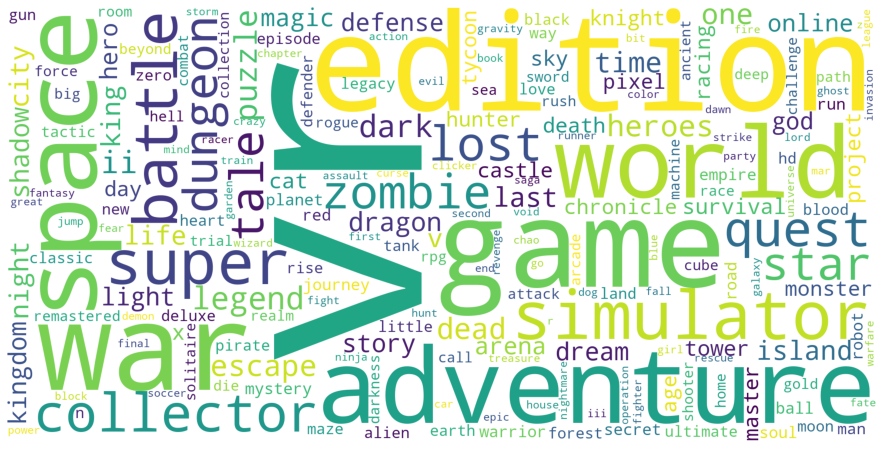

In [8]:
# fancy wordcloud to see commonly used words in game titles

from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))
# clean residuals from text formatting
newStopWords = ["amp", "quot"]
sw = sw.union(newStopWords)

def clean_text(sample):
    sample = sample.lower()
    
    # remove formatting, punctuation
    sample = sample.replace("<br /><br />", "")
    sample = re.sub("[^a-zA-Z]+", " ", sample)
    
    sample = sample.split()
    
    sample = " ".join(sample)
    
    return sample

data["name_clean"] = data["name"].apply(clean_text)
name_corpus = ' '.join(data["name_clean"])
name_wordcloud = WordCloud(stopwords = sw, background_color = 'white', height = 1000, width = 2000).generate(name_corpus)
plt.figure(figsize=(16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

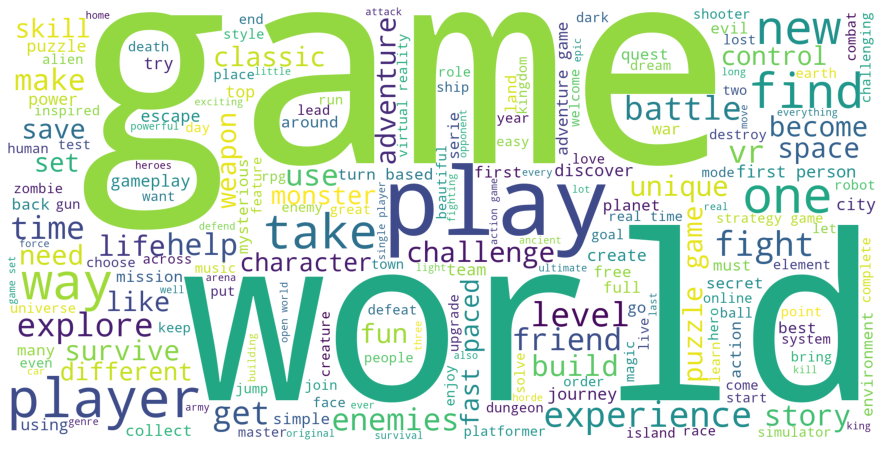

In [9]:
# wordcloud of game descriptions
data["description_clean"] = data["short_description"].apply(clean_text)
description_corpus = ' '.join(data["description_clean"])
description_wordcloud = WordCloud(stopwords = sw, background_color = 'white', height = 1000, width = 2000).generate(description_corpus)
plt.figure(figsize=(16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

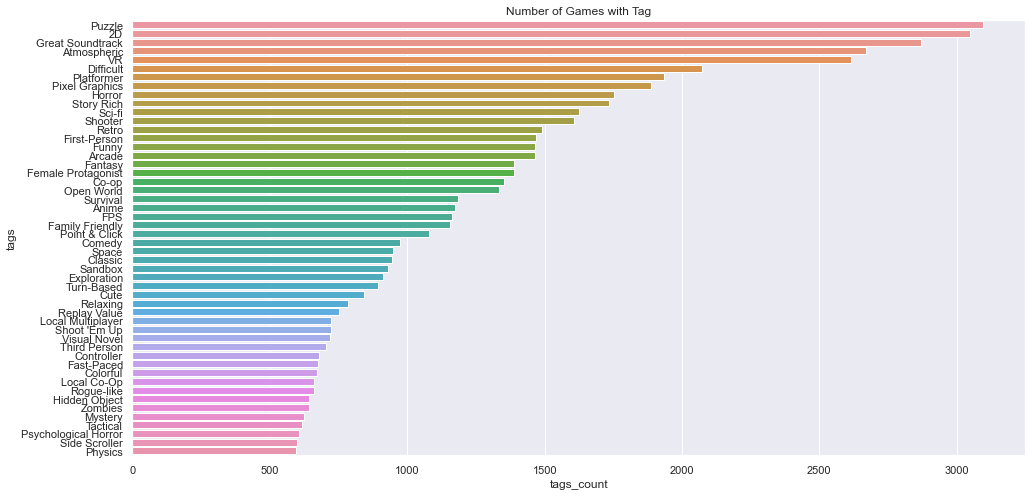

In [10]:
tags_count = pd.DataFrame(data.additional_tags.str.split(';').explode().value_counts()).reset_index()
tags_count.columns = ["tags", "tags_count"]
tags_count = tags_count[(tags_count["tags"] != "Singleplayer") & (tags_count["tags"] != "Multiplayer") & (tags_count["tags"] != "NSFW")]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "tags_count", y = "tags", data = tags_count.head(50))
plt.title("Number of Games with Tag");

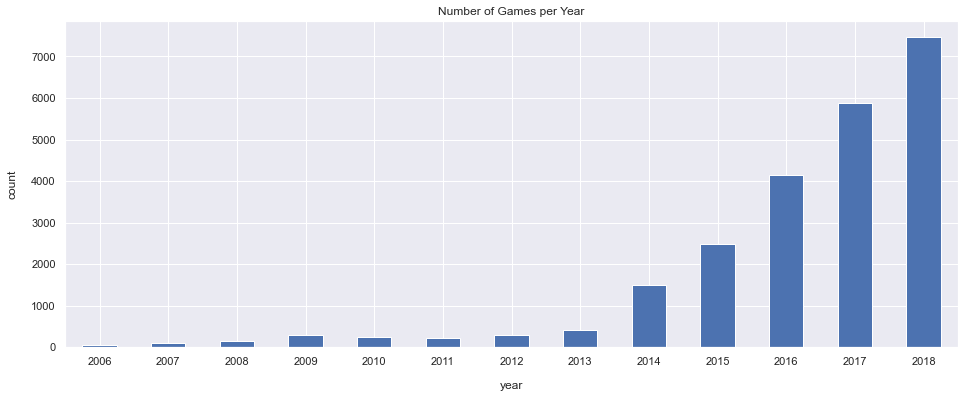

In [11]:
# convert release date to year
data["year"] = pd.to_datetime(data["release_date"]).dt.year

year_count = pd.DataFrame(data = data["year"].value_counts().sort_index())
year_count = year_count.loc[2006:2018]
f = plt.figure(figsize=(16, 6))
year_count["year"].plot(kind = "bar", rot = 0);
plt.xlabel("year", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Number of Games per Year");

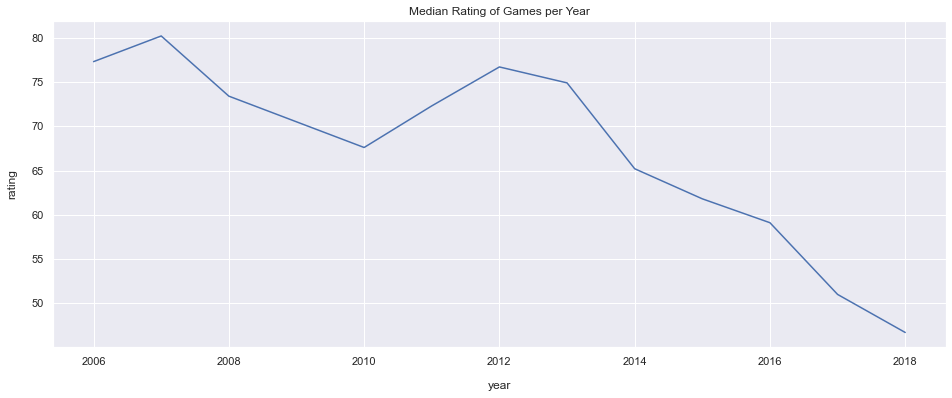

In [12]:
rating_trend = pd.DataFrame(data = data["rating"].groupby(data["year"]).median())
rating_trend = rating_trend.loc[2006:2018]
f = plt.figure(figsize=(16, 6))
rating_trend["rating"].plot(kind = "line", rot = 0);
plt.xlabel("year", labelpad=14)
plt.ylabel("rating", labelpad=14)
plt.title("Median Rating of Games per Year");

OH NO! Are games getting worse? :(

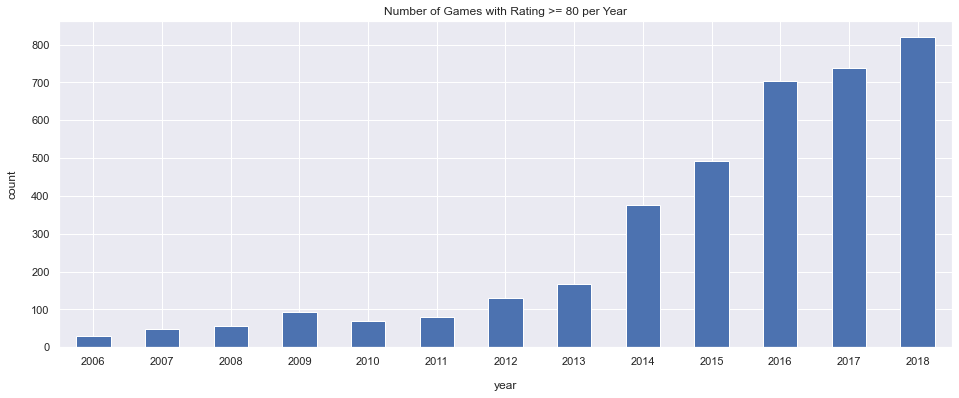

In [13]:
gg_trend = pd.DataFrame(data[data["rating"] >= 80]["rating"].groupby(data["year"]).count().loc[2006:2018])
f = plt.figure(figsize=(16, 6))
gg_trend["rating"].plot(kind = "bar", rot = 0);
plt.xlabel("year", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Number of Games with Rating >= 80 per Year");

Phew, false alarm... Nope, the number of good games are increasing!
- The decrease in median rating of games over time is possibly due to the over-saturation of low-quality games and smaller releases now. The entry cost of creating games are much lower and tools to create games are more accessible now, anyone and not just game companies can start making games. Hence even though the number of good games are increasing, it is still a small proportion compared to the total number of games released.

In [14]:
data[["name", "developer", "genres", "initialprice", "rating", "year", "owners"]].sort_values("rating", ascending = False).head(20)

,name,developer,genres,initialprice,rating,year,owners
23,Portal 2,Valve,Action;Adventure,9.99,98.6,2011,1500000
7312,Factorio,Wube Software LTD.,Casual;Indie;Simulation;Strategy;Early Access,30.00,98.4,2016,150000
2255,One Finger Death Punch,Silver Dollar Games,Action;Casual;Indie,4.99,98.0,2014,750000
7248,Iron Snout,SnoutUp,Action;Free to Play;Indie,0.00,97.8,2016,150000
17,Portal,Valve,Action,9.99,97.8,2007,1500000
6885,TY the Tasmanian Tiger,Krome Studios,Action;Adventure;Indie,14.99,97.8,2016,75000
4236,Finding Paradise,Freebird Games,Adventure;Indie;RPG,9.99,97.8,2017,250000
7144,OneShot,Little Cat Feet,Adventure;Casual;Indie,9.99,97.8,2016,250000
2980,RimWorld,Ludeon Studios,Indie;Simulation;Strategy,34.99,97.7,2018,150000
2014,A Hat in Time,Gears for Breakfast,Adventure;Indie,29.99,97.7,2017,250000


Taking a look at the **top 20 games**, Action, Adventure, Indie seem to be common genres of top games. Notably, only 1 is a free-to-play game.

In [15]:
# we will only look at 'main' genres of games, since some titles on steam w/ genres eg. Photo Editing arent really games
genre_cols = ["Action",
            "Adventure",
            "Casual",
            "Indie",
            "Massively Multiplayer",
            "RPG",
            "Racing",
            "Simulation",
            "Sports",
            "Strategy"]

## Investigating Genres
We will perform **Dummy Encoding** on our categorical genres and additional tags data. Then, we will observe the rating distribution across genres.

In [16]:
# dummy encoding for additional tags
tags_encoding = data.additional_tags.str.split(';').explode().str.get_dummies().groupby(level=0).sum()

In [17]:
# dummy encoding for genres
genre_encoding = data["genres"].str.get_dummies(';').filter(genre_cols)
genre_encoding

,Action,Adventure,Casual,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
25301,0,1,1,1,0,0,0,0,0,0
25302,1,1,0,1,0,0,0,0,0,0
25303,1,0,1,1,0,0,0,0,0,0
25304,0,1,1,1,0,0,0,0,0,0


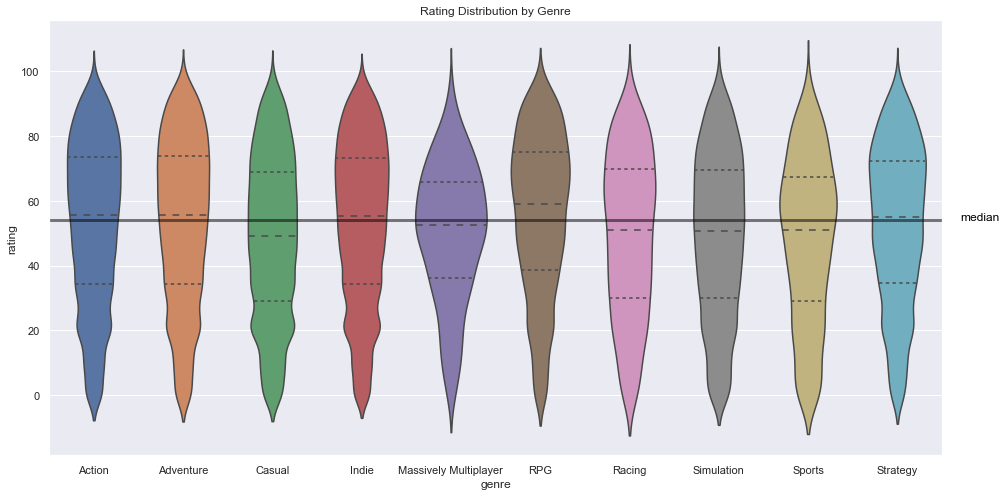

In [18]:
genres_df = data[["steam_appid", "rating", "initialprice"]]
genres_df = pd.concat([genres_df, genre_encoding], axis = "columns")

genres_data = pd.DataFrame()
# create new dataframe with each entry of genre to respective rating, as games can belong to multiple genres
for col in genre_cols:
    ratings = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "rating"].values, columns = ["rating"])
    ratings["genre"] = col
    genres_data = pd.concat([genres_data, ratings], axis = 0)

fig, ax = plt.subplots(figsize=(16, 8))
sb.violinplot(x = "genre", y = "rating", data = genres_data, inner = "quartile", ax = ax)
ax.set_title("Rating Distribution by Genre")
ax.axhline(genres_data.rating.median(), color = "black", lw = 3, alpha = 0.5)
ax.text(9.7, genres_data.rating.median(), "median", color = 'black')
plt.show()

Not much variations in rating across genres, maybe because of how games can and often have multiple genres. eg. Action games usually come together with Adventure

- Massively Multiplayer games are mostly distributed around its median and tend to have much lower ratings than other genres 
- Racing, Simulation, Sports games have slightly lower ratings than most genres
- RPG games have much higher ratings than other genres
- Casual games have much lower ratings than other genres

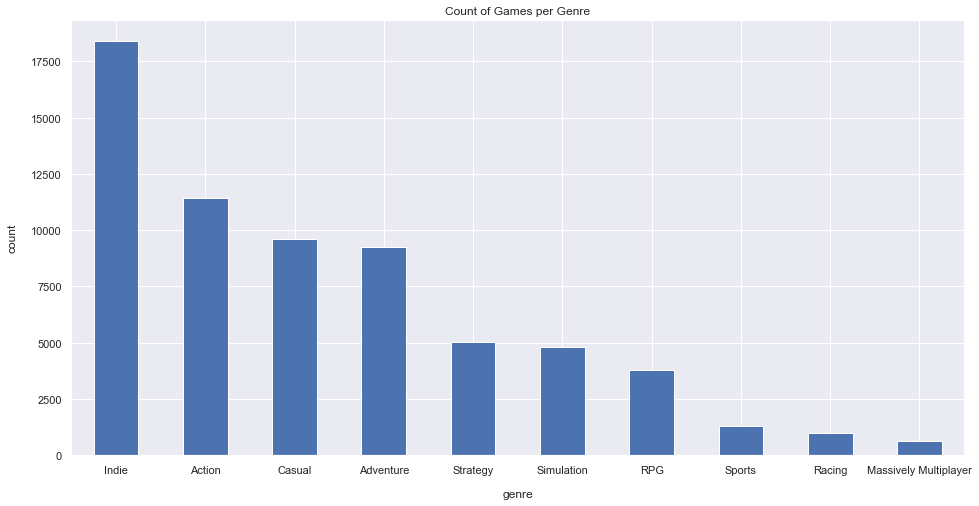

In [19]:
f = plt.figure(figsize=(16, 8))
genres_data["genre"].value_counts().plot(kind = "bar", rot = 0);
plt.xlabel("genre", labelpad=14)
plt.ylabel("count", labelpad=14)
plt.title("Count of Games per Genre");

- Massively Multiplayer games are fewest
- Very few Sports and Racing games
- A lot of Indie games aka games by non-AAA developers, meaning smaller development studios or solo-devs 

## Investigating Developers
We will use the ratings of games made by a developer to determine the score of that developer.
- However, developers have different number of games created. eg. A developer that has only 1 highly rated game (rating: 90) should not be considered as good as a developer that have 3 highly rated games (ratings: 90, 90, 90). 

Hence we will use **Bayesian Averaging** to also take into account the sample size when ranking a developer.

![Bayesian Average](https://i.stack.imgur.com/g9uew.png)
- S = score of dev
- R = average of game ratings for the dev
- C = average of game ratings for all devs
- w = weight assigned to R and computed as v/(v+m), where v = number of game ratings for that dev, m = average number of game ratings for all devs

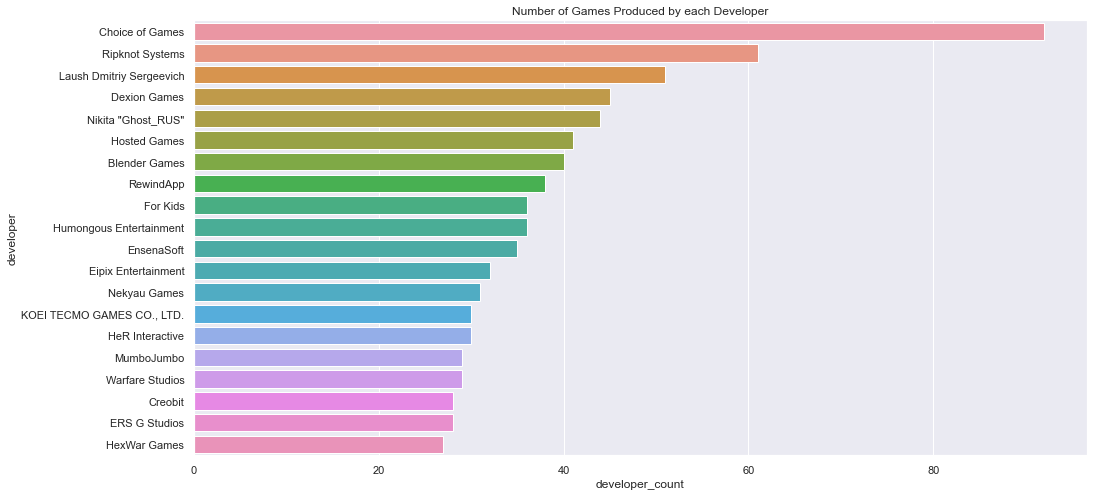

In [20]:
developer_count = pd.DataFrame(data.developer.str.split(';').explode().value_counts()).reset_index()
developer_count.columns = ["developer", "developer_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "developer_count", y = "developer", data = developer_count.head(20))
plt.title("Number of Games Produced by each Developer");

In [21]:
# get top developers by scoring using Bayesian Average: S = wR + (1-w)C
# S = score of dev
# R = average of game ratings for the dev
# C = average of game ratings for all devs
# W = weight assigned to R and computed as v/(v+m), 
# where v = number of game ratings for that dev, m = average number of game ratings for all devs

developer_df = data[["rating", "developer"]]
ratings = developer_df.groupby(["developer"])["rating"].apply(list)
ratings = pd.DataFrame(ratings)
ratings = ratings.merge(developer_count, on = "developer")

ratings["R"] = ratings["rating"].apply(lambda x: sum(x)/len(x))
C = ratings["rating"].apply(lambda x: sum(x)).sum() / ratings["developer_count"].sum()
M = ratings["developer_count"].sum() / ratings.shape[0]
ratings["W"] = ratings["developer_count"] / (ratings["developer_count"]+M)
ratings["S"] = ratings["W"]*ratings["R"] + (1 - ratings["W"])*C

developer_data = ratings[["developer", "S"]]
developer_data = developer_data.rename(columns = {"S":"score"})

developer_data.sort_values(by = "score", ascending = False).head(20)

,developer,score
14357,Valve,86.205376
8,07th Expansion,85.901044
9314,Nihon Falcom,85.445068
9279,Nickervision Studios,85.284050
2977,Croteam,85.095288
11142,Relic Entertainment,85.033024
14669,Wadjet Eye Games,84.468218
11791,Scott Cawthon,84.133517
1055,Artifex Mundi,82.318785
11513,Rusty Lake,82.107559


## Other Categorical Variables

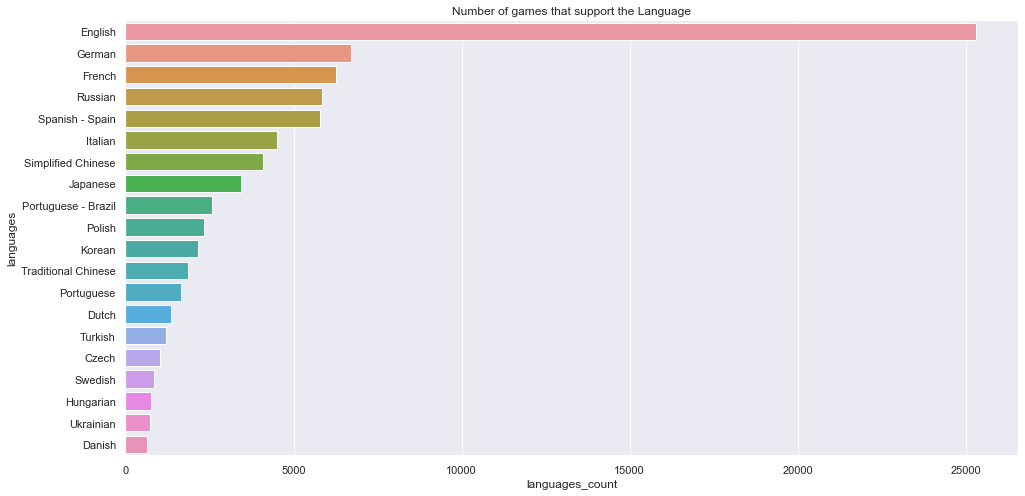

In [22]:
languages_count = pd.DataFrame(data.languages.str.split(';').explode().value_counts()).reset_index()
languages_count.columns = ["languages", "languages_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "languages_count", y = "languages", data = languages_count.head(20))
plt.title("Number of games that support the Language");

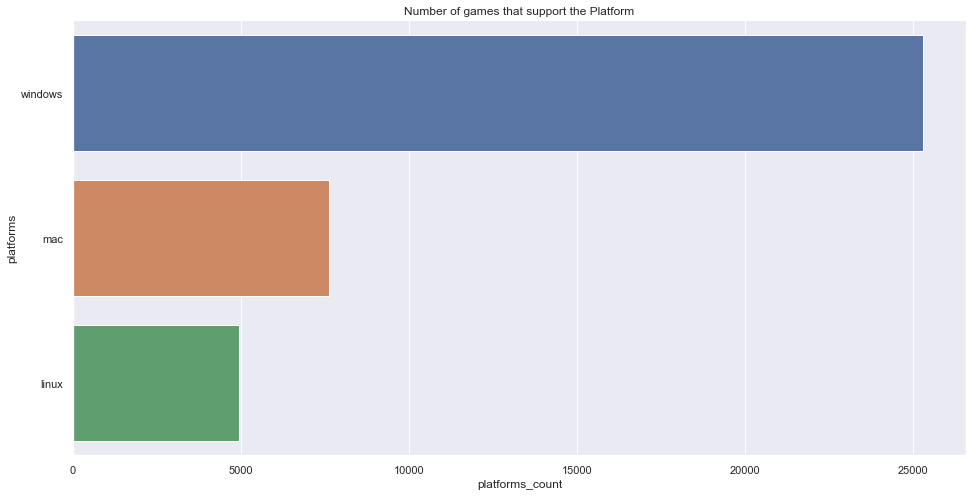

In [23]:
platforms_count = pd.DataFrame(data.platforms.str.split(';').explode().value_counts()).reset_index()
platforms_count.columns = ["platforms", "platforms_count"]

f = plt.figure(figsize=(16, 8))
sb.barplot(x = "platforms_count", y = "platforms", data = platforms_count.head(20))
plt.title("Number of games that support the Platform");

## Investigating Numeric Variables

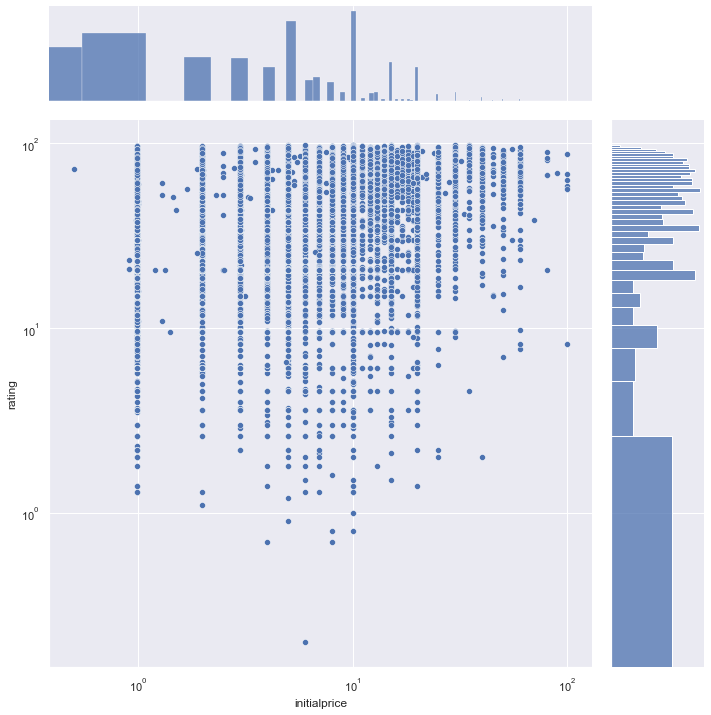

In [24]:
# remove extreme outliers distorting the scale
price_df = pd.concat([data[data["initialprice"] < 199]["initialprice"], data["rating"]], axis = 1)
g = sb.jointplot(data = price_df, x = "initialprice", y = "rating", height = 10)

g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')

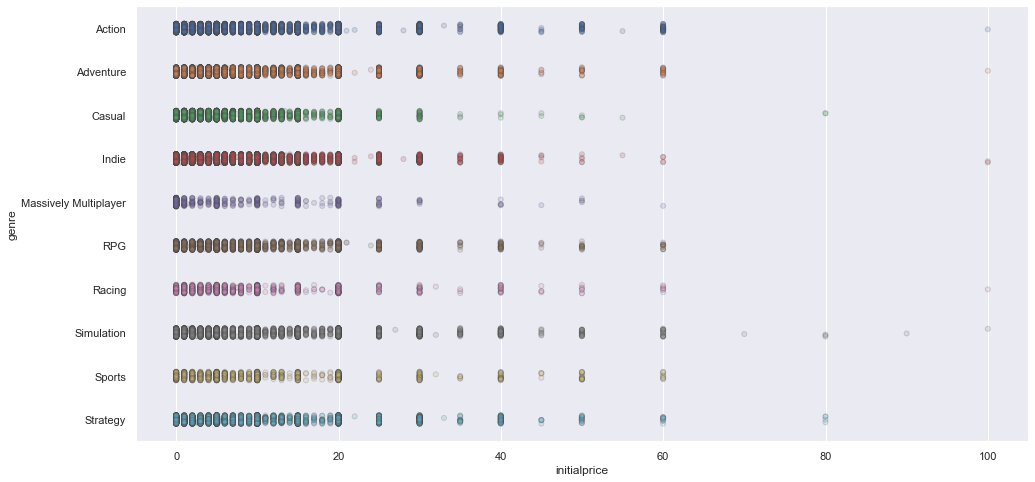

In [25]:
prices_data = pd.DataFrame()

for col in genre_cols:
    prices = pd.DataFrame(genres_df.loc[genres_df[col] == 1, "initialprice"].values, columns = ["initialprice"])
    prices["genre"] = col
    prices_data = pd.concat([prices_data, prices], axis = 0)
    
# remove extreme outliers distorting the scale
prices_data = prices_data[prices_data["initialprice"] < 100]
f = plt.figure(figsize=(16, 8))
ax = sb.stripplot(x="initialprice", y="genre", data=prices_data, jitter=True, alpha=0.2, linewidth=1);

Most games are priced below 20 dollars, almost all games are priced at 60 dollars or less.
- Games which are Massively Multiplayer tend to be free or cheaper, mainly because of the business model (free-to-play or low entry cost but huge amount of in-game microtransactions)

## Feature Engineering
- In our dataset, in our categorical data: there are 10 genres, over 300 additional tags, over 16000 developers, and over 13000 publishers. The large number of additional tags, developers and publishers are not really useful as features in our model. Furthermore, most developers and publishers have not made many games and so it is hard to learn anything about them. Hence we decide to discard `developer`, `publisher` in our models.
- For this analysis, we will not take into account the playtime and number of owners. This is because we want to take into account the inherent 'goodness' of the game itself. eg. There might be games that are under-rated or not as widely marketed, or short games (for instance: a replayable Battle Royale vs. Story-based game with definitive ending). Hence these games may not have as many owners or as much playtime, but people may still consider them as very good games. Furthermore, we want to predict whether a new game will be good, hence such information will not be known before the game has released.

In [26]:
# get relevant columns
var = data[["steam_appid", "controller_support", "dlc", "demos", "movies", "achievements", "is_multiplayer", "initialprice", "rating", "year", "owners"]].copy()

In [27]:
# platforms -> no. of platforms supported, languages -> no. of languages supported
var["platforms"] = data["platforms"].apply(lambda x: len(x.split(';')))
var["languages"] = data["languages"].apply(lambda x: len(x.split(';')))

In [28]:
var = pd.concat([var, genres_df], axis = "columns")
var = var.loc[:,~var.columns.duplicated()]

In [29]:
# get additional tag columns
var = pd.concat([var, tags_encoding], axis = "columns")

In [30]:
# drop games with extreme outliers
cols = ["achievements", "initialprice", "languages", "platforms", "rating", "owners"]

Q1 = var[cols].quantile(0.01)
Q3 = var[cols].quantile(0.99)
IQR = Q3 - Q1 # inter-quartile range

var = var[~((var[cols] < (Q1 - 1.5 * IQR)) | (var[cols] > (Q3 + 1.5 * IQR))).any(axis = 1)].reset_index(drop = True)

<AxesSubplot:>

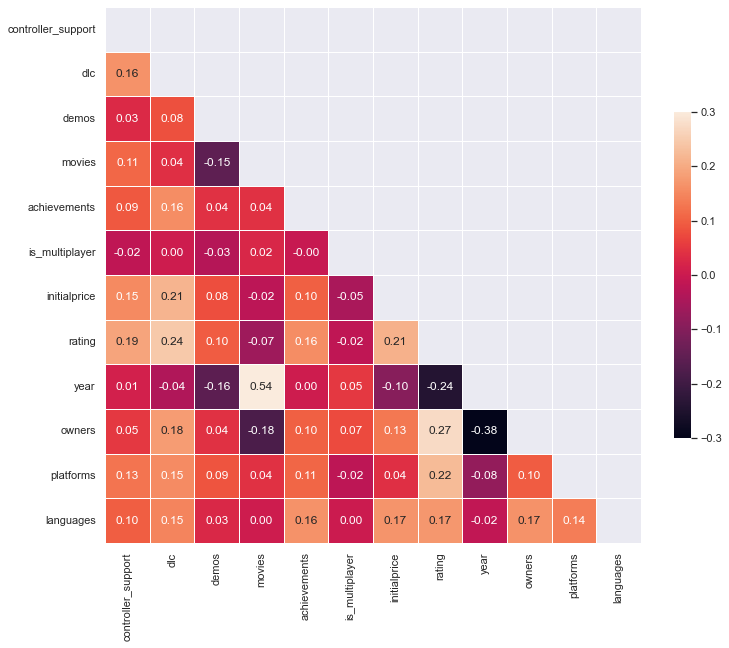

In [31]:
var_corr = var.loc[:,"controller_support":"languages"].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(var_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(var_corr, mask=mask, cmap="rocket", vmin = -0.3, vmax = 0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = ".2f")

Notable observations:
- `controller_support`, `dlc`, `demos`, `achievements`, `initialprice`, `platforms`, `languages` seem to be correlated with rating. Surprisingly, whether a game `is_multiplayer` has almost no correlation to its rating.

<AxesSubplot:>

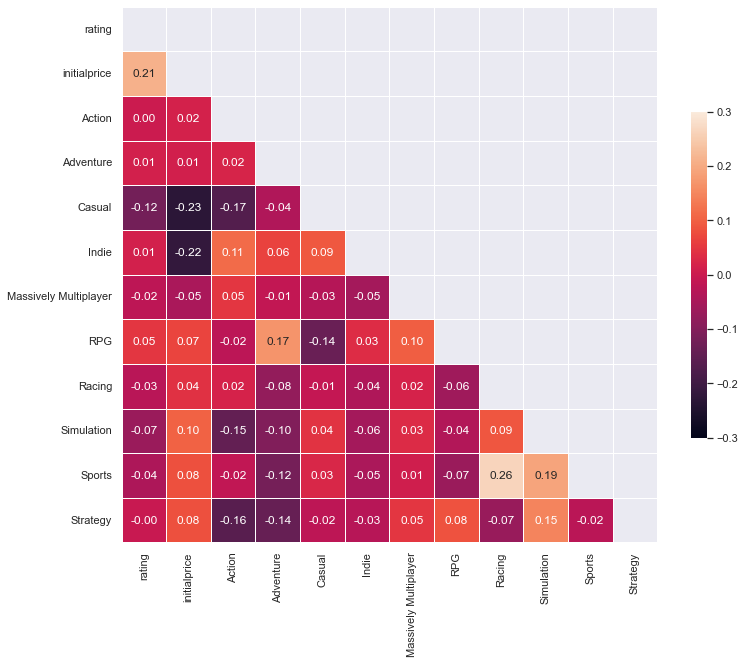

In [32]:
# Compute the correlation matrix
var_corr = pd.concat([var[["rating", "initialprice"]], var.loc[:,"Action":"Strategy"]], axis = "columns").corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(var_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(var_corr, mask=mask, cmap="rocket", vmin = -0.3, vmax = 0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True, fmt = ".2f")

Notable observations:
- `rating` does not really seem to have much correlation with the different genres, except for being negatively correlated with `Casual`. Maybe Casual games are usually of lower quality?
- Certain relationships between genres can be seen. For example, `Sports` games usually come with `Racing` and `Simulation`, `RPG` games usually come with `Adventure`.
- `Casual` and `Indie` games are negatively correlated with `initialprice`, implying that these games are cheaper.

## Regression Models 

Now, we will see if we can predict the `rating` of a game, and investigate what could be the most important features in making a good game.
- First, we will do **Feature Selection** to reduce the number of our input variables using `SelectKBest`. This is to reduce the computational cost of modeling. We will then **standardize** the data using `StandardScaler` to account for input values with differing scales.
- We will do a 80:20 `train_test_split` for our data and investigate the performance of various regression models (`LinearRegression`, `GradientBoostingRegressor`, `RandomForestRegressor`), while doing **k-fold Cross Validation**. K-fold Cross Validation partitions the data to build a more generalized model.

In [33]:
# X is inputs, y is output
X = var.drop(["rating", "steam_appid", "year", "owners"], axis = 1)
y = var["rating"] 

### Feature Selection

In [34]:
# feature selection
from sklearn.feature_selection import f_regression, SelectKBest

X = X.drop(["Singleplayer", "Multiplayer"], axis = "columns")
# select top 20 input variables based on feature importance
select = SelectKBest(score_func = f_regression, k = 20)
features_data = select.fit_transform(X, y)
top_features = select.get_support()
X = pd.DataFrame(features_data, columns = select.feature_names_in_[top_features])
features = pd.DataFrame(select.scores_, columns = ["score"], index = select.feature_names_in_).sort_values("score", ascending = False)

In [35]:
# selected top features
features.head(20)

,score
Great Soundtrack,2122.543497
dlc,1579.277570
platforms,1313.105878
initialprice,1140.480570
2D,1092.428612
Story Rich,1012.008811
controller_support,947.475996
Pixel Graphics,851.356808
Atmospheric,771.056944
languages,755.660215


Interesting, seems like these are the top features in determining whether a game is good or not!

In [36]:
from sklearn.model_selection import train_test_split

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69) 

### Linear Regression

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K-Fold cross validation technique
validation_type = KFold(n_splits = 10)

# Cross validation score of Linear Regression model
cv_lr_train = cross_val_score(lr, X_train, y_train, cv = validation_type, scoring = "r2")
cv_lr_test = cross_val_score(lr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_lr_train}")
print(f"test: {cv_lr_test}")
print()
print(f"Linear Regression R^2 (train): {cv_lr_train.mean():.3f}")
print(f"Linear Regression R^2 (test): {cv_lr_test.mean():.3f}")

train: [0.23688543 0.2030468  0.26677424 0.23672174 0.2099841  0.21532068
 0.24925463 0.25763929 0.20330939 0.23027989]
test: [0.21946813 0.27818883 0.26749507 0.2145103  0.2440647  0.19476772
 0.21300588 0.21406533 0.20965085 0.2652638 ]

Linear Regression R^2 (train): 0.231
Linear Regression R^2 (test): 0.232


In [39]:
from sklearn.metrics import mean_squared_error

# Predict test set and calculate mean squared error
lr_predict = lr.predict(X_test)
print(f"Linear Regression MSE (test): {mean_squared_error(y_test, lr_predict):.3f}")
print(f"Linear Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, lr_predict)):.3f}")
print(f"Intercept of regression: {lr.intercept_:3f}")
print(f"Coefficients of regression:", lr.coef_)

Linear Regression MSE (test): 488.507
Linear Regression RMSE (test): 22.102
Intercept of regression: 52.307467
Coefficients of regression: [1.62302714 2.47092972 1.62602378 2.7801583  3.14205554 1.33929844
 0.85528919 1.71331483 0.25626796 2.38416339 1.42919524 1.0119011
 0.47122513 1.23856976 0.9752957  2.06194433 2.31753936 2.32461714
 0.12244578 1.05967067]


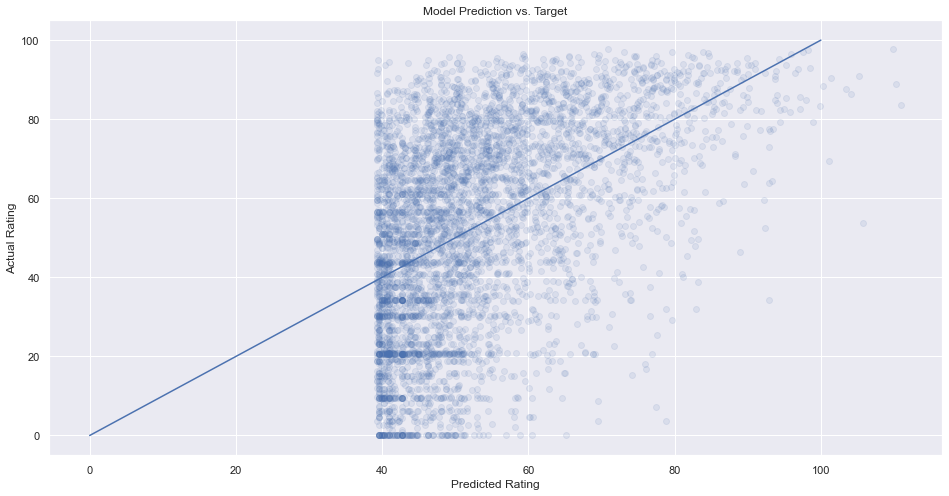

In [40]:
f = plt.figure(figsize=(16, 8))
plt.scatter(lr_predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 100), np.linspace(0, 100))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

In [41]:
import scipy.stats as stats

def diagnostic_plot(x, y):
    plt.figure(figsize = (20,5))

    plt.subplot(1, 3, 1)
    plt.scatter(x, y, alpha = 0.1)
    plt.plot(x, x, color = "blue", linewidth = 1)
    plt.title("Regression Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - x
    plt.scatter(x, res, alpha = 0.1)
    plt.title("Residual Plot")
    plt.xlabel("Prediction")
    plt.ylabel("Residuals")
    
    plt.subplot(1, 3, 3)
    # Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
    stats.probplot(res, dist = "norm", plot = plt)
    plt.title("Normal Q-Q plot");

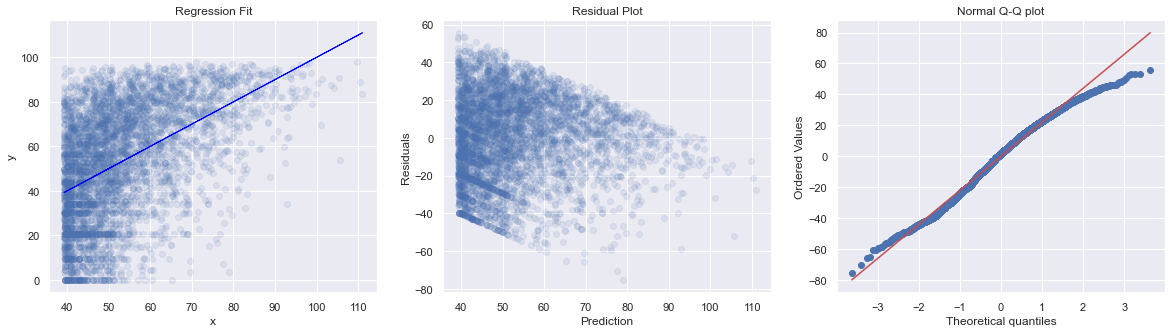

In [42]:
diagnostic_plot(lr_predict, y_test)

Looking at the **low accuracy** of both train/test data and the diagnostic plots, it can be seen that there is **underfitting** of the data. This may be because
- the models may not be suitable to capture the relationship.
- the points in our dataset have too much variation. There is still not much strong correlation between rating and the predictors chosen. 

However, the low accuracy may be normal because we are using **real-world data**. In reality, it may be that the factors that we are analyzing do not strongly influence whether a game is good or not.
- Predicting IMDB movie ratings with similarly many categorical variables using regression models using also seemed to give low accuracy: https://jazpeng.github.io/predict_movie_ratings/

Now, we will investigate the performance of other models and Gradient Boosting.

### Ridge Regression

In [43]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv = 10).fit(X_train, y_train)
print(f"Ridge Regression R^2 (train): {ridge.score(X_train, y_train):.3f}")
print(f"Ridge Regression R^2 (test): {ridge.score(X_test, y_test):.3f}")

Ridge Regression R^2 (train): 0.233
Ridge Regression R^2 (test): 0.234


### Huber Regression

In [44]:
from sklearn.linear_model import HuberRegressor

hr = HuberRegressor(max_iter = 5000)
hr.fit(X_train, y_train)

validation_type = KFold(n_splits = 10)

cv_hr_train = cross_val_score(hr, X_train, y_train, cv = validation_type, scoring = "r2")
cv_hr_test = cross_val_score(hr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_hr_train}")
print(f"test: {cv_hr_test}")
print()
print(f"Huber Regression R^2 (train): {cv_hr_train.mean():.3f}")
print(f"Huber Regression R^2 (test): {cv_hr_test.mean():.3f}")

train: [0.23373171 0.1989382  0.26319033 0.23717279 0.20630344 0.21177162
 0.24826792 0.25776256 0.2011889  0.22691082]
test: [0.21980479 0.27689716 0.27000226 0.21576606 0.24151652 0.18952485
 0.20861069 0.20720037 0.20407041 0.26341265]

Huber Regression R^2 (train): 0.229
Huber Regression R^2 (test): 0.230


###  KNN Regression

In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(X_train, y_train)

cv_knn_train = cross_val_score(knn, X_train, y_train, cv = validation_type, scoring = "r2")
cv_knn_test = cross_val_score(knn, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_knn_train}")
print(f"test: {cv_knn_test}")
print()
print(f"K-Nearest Neighbors Regression R^2 (train): {cv_knn_train.mean():.3f}")
print(f"K-Nearest Neighbors Regression R^2 (test): {cv_knn_test.mean():.3f}")

train: [0.26041618 0.23998992 0.29847486 0.25370607 0.24100733 0.24642541
 0.27951883 0.29712595 0.24194893 0.26819926]
test: [0.2269607  0.32677854 0.25930788 0.23118461 0.25874586 0.23913631
 0.22601586 0.25325715 0.24785474 0.28067072]

K-Nearest Neighbors Regression R^2 (train): 0.263
K-Nearest Neighbors Regression R^2 (test): 0.255


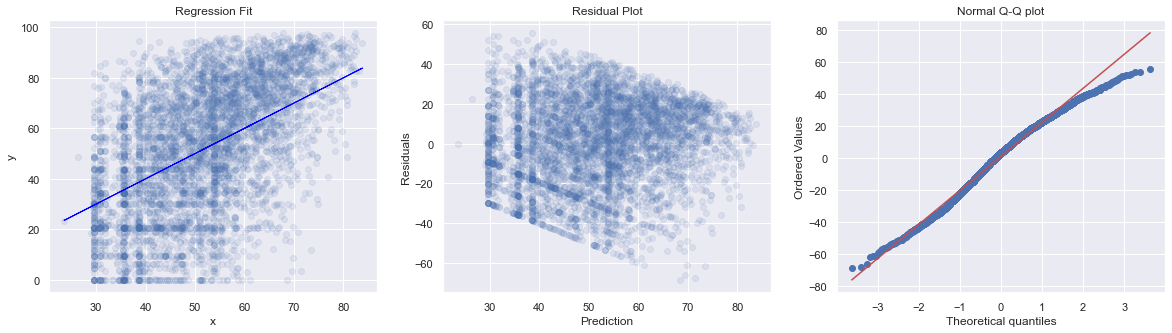

In [46]:
knn_predict = knn.predict(X_test)
diagnostic_plot(knn_predict, y_test)

### Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
# K-Fold cross validation technique
validation_type = KFold(n_splits = 10)

# Cross validation score of Random Forest Regressor model
cv_rf_train = cross_val_score(rf, X_train, y_train, cv = validation_type, scoring = "r2")
print(f"Random Forest Regressor R^2 (train): {cv_rf_train.mean():.3f}")
cv_rf_test = cross_val_score(rf, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"Random Forest Regressor R^2 (test): {cv_rf_test.mean():.3f}")

Random Forest Regressor R^2 (train): 0.231
Random Forest Regressor R^2 (test): 0.216


In [49]:
rf_predict = rf.predict(X_test)
print(f"Random Forest Regressor MSE (test): {mean_squared_error(y_test, rf_predict):.3f}")
print(f"Random Forest Regressor RMSE (test): {np.sqrt(mean_squared_error(y_test, rf_predict)):.3f}")

Random Forest Regressor MSE (test): 480.825
Random Forest Regressor RMSE (test): 21.928


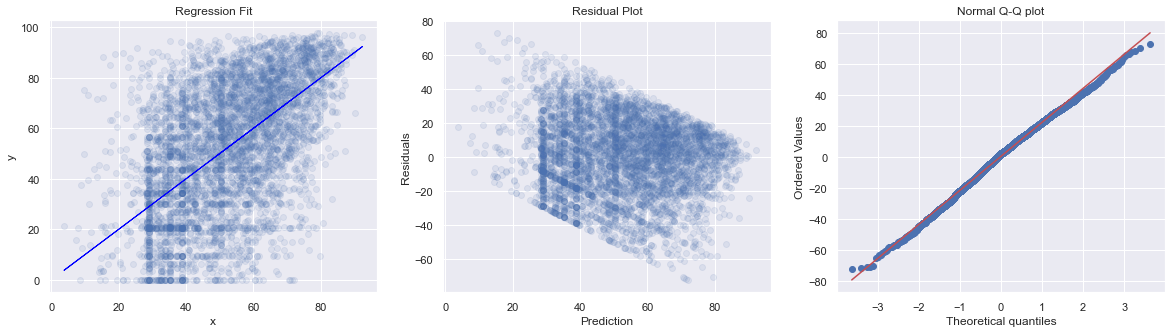

In [50]:
diagnostic_plot(rf_predict, y_test)

## Gradient Boosting Regression

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(subsample = 0.5, n_estimators = 250)
gbr.fit(X_train, y_train)

validation_type = KFold(n_splits = 10)

cv_gbr_train = cross_val_score(gbr, X_train, y_train, cv = validation_type, scoring = "r2")
cv_gbr_test = cross_val_score(gbr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_gbr_train}")
print(f"test: {cv_gbr_test}")
print()
print(f"Gradient Boosting Regression R^2 (train): {cv_gbr_train.mean():.3f}")
print(f"Gradient Boosting Regression R^2 (test): {cv_gbr_test.mean():.3f}")

train: [0.30511933 0.25760656 0.32780903 0.3002016  0.29731321 0.28702789
 0.3223089  0.33619596 0.27889235 0.31297222]
test: [0.2697543  0.35404818 0.2991557  0.27629429 0.30799049 0.27354616
 0.26626465 0.29457727 0.27479257 0.29946523]

Gradient Boosting Regression R^2 (train): 0.303
Gradient Boosting Regression R^2 (test): 0.292


In [83]:
# Predict test set and calculate mean squared error
gbr_predict = gbr.predict(X_test)
print(f"Gradient Boosting Regression MSE (test): {mean_squared_error(y_test, gbr_predict):.3f}")
print(f"Gradient Boosting Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, gbr_predict)):.3f}")

Gradient Boosting Regression MSE (test): 441.349
Gradient Boosting Regression RMSE (test): 21.008


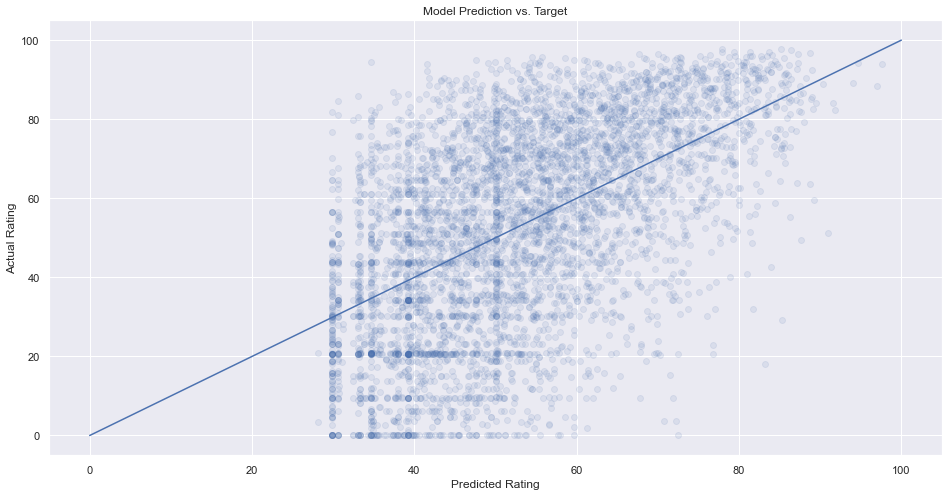

In [84]:
f = plt.figure(figsize=(16, 8))
plt.scatter(gbr_predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 100), np.linspace(0, 100))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

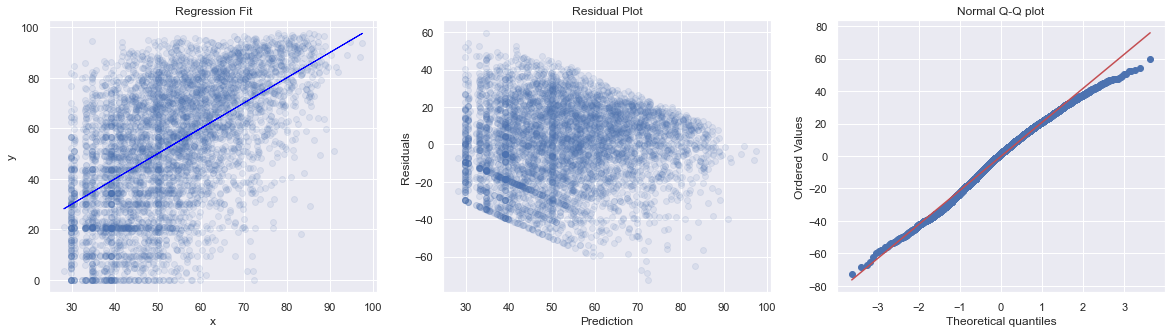

In [85]:
diagnostic_plot(gbr_predict, y_test)

Seems like **Gradient Boosting Regression** performs the best, with similar cross-validated train and test scores, indicating no over-fitting.

In [55]:
# feature importances
# pd.DataFrame(data = gbr.feature_importances_, index = X.columns, columns = ["importance"]).sort_values("importance", ascending = False)